In [82]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
df = pd.read_csv(r"C:\Users\Dell\Work_tasks\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Plot Histograms to Visualize Data Distribution and Check Skewness



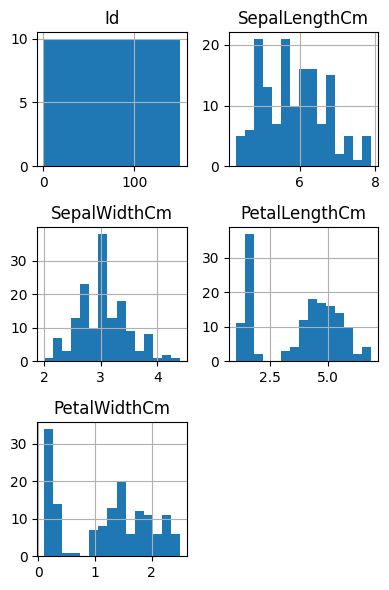

In [61]:
print("Plot Histograms to Visualize Data Distribution and Check Skewness\n")
df.hist(bins=15, figsize=(4, 6))
plt.tight_layout()
plt.show()

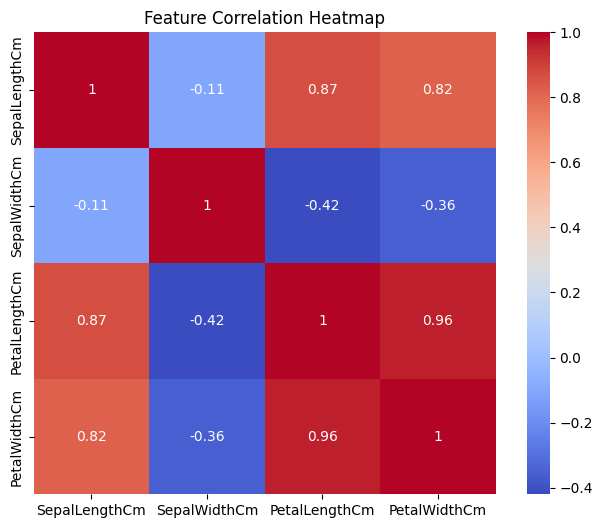

In [84]:
numeric_df = df.drop(columns=['Species', 'Id'])  
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [62]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = pd.get_dummies(df['Species']).values

In [ ]:
print("Standardize the features for better performance\n")
scaler = StandardScaler()
X = scaler.fit_transform(X)

Standardize the features for better performance



In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)
y_test = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

In [70]:
class ImprovedIrisANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImprovedIrisANN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)  
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x)) 
        x = self.output(x) 
        return x

In [73]:
input_size = X.shape[1]
hidden_size = 10
output_size = y.shape[1]
learning_rate = 0.001
epochs = 1000

In [74]:
model = ImprovedIrisANN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [90]:
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)

    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

    if (epoch + 1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            _, test_preds = torch.max(test_outputs, 1)
            test_accuracy = accuracy_score(y_test, test_preds)
            test_accuracies.append(test_accuracy * 100)  
            
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss.item():.4f}')


Epoch [100/1000], Loss: 0.0022
Epoch [200/1000], Loss: 0.0019
Epoch [300/1000], Loss: 0.0017
Epoch [400/1000], Loss: 0.0015
Epoch [500/1000], Loss: 0.0013
Epoch [600/1000], Loss: 0.0012
Epoch [700/1000], Loss: 0.0011
Epoch [800/1000], Loss: 0.0010
Epoch [900/1000], Loss: 0.0009
Epoch [1000/1000], Loss: 0.0008


In [80]:
model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    test_outputs = model(X_test)

    _, train_preds = torch.max(train_outputs, 1)
    _, test_preds = torch.max(test_outputs, 1)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    print(f'Accuracy: {test_accuracy * 100:.2f}%')

Accuracy: 96.67%


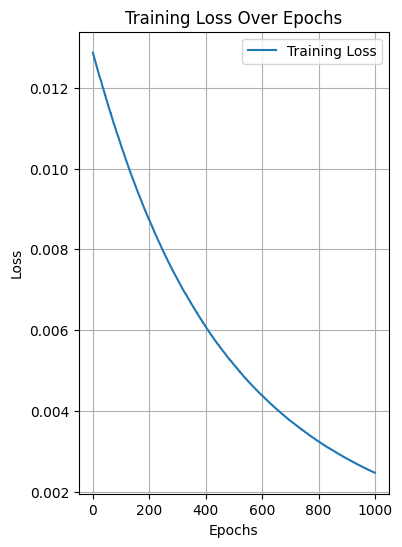

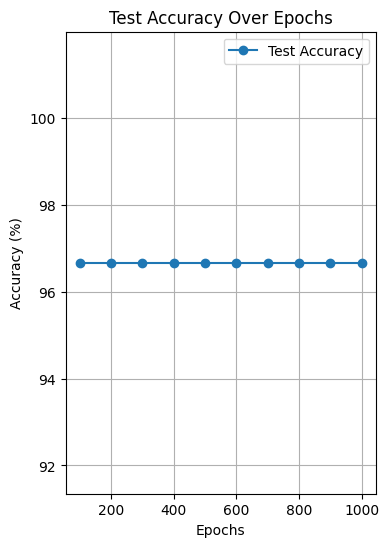

In [89]:
import matplotlib.pyplot as plt

# Plot Training Loss
plt.figure(figsize=(4, 6))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot Test Accuracy
plt.figure(figsize=(4, 6))
plt.plot(range(100, epochs + 1, 100), test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

In [81]:
precision = precision_score(y_test, test_preds, average='macro')
recall = recall_score(y_test, test_preds, average='macro')
f1 = f1_score(y_test, test_preds, average='macro')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Precision: 96.67%
Recall: 96.97%
F1 Score: 96.66%


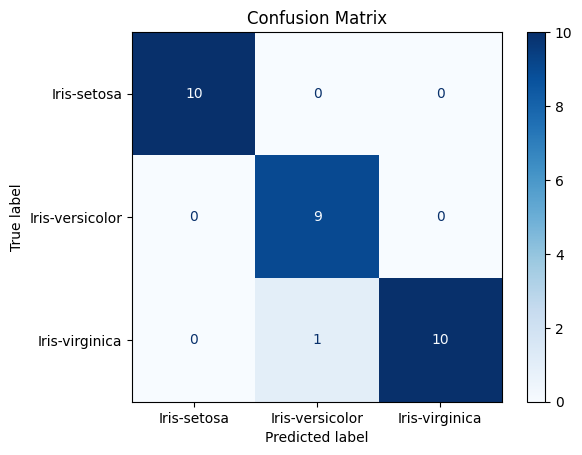

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, test_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(df['Species']))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()